<a href="https://colab.research.google.com/github/Soob00/20251R0136COSE47101/blob/dataset1_decisionTree/notebooks/dataset1_decisiontree_all_variables_stresslevel_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text, DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import shap


In [ ]:
df = pd.read_csv("/content/processed_all_dataset2.csv")
df

,Age,Exercise Level,Sleep Hours,Stress Level,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score,Country_Brazil,Country_Canada,...,Gender_Male,Gender_Other,Diet Type_Junk Food,Diet Type_Keto,Diet Type_Vegan,Diet Type_Vegetarian,Mental Health Condition_Bipolar,Mental Health Condition_Depression,Mental Health Condition_None,Mental Health Condition_PTSD
0,0.652174,1,-0.117319,1,0.025641,0.333333,0.755556,0.611111,1,0,...,1,0,0,0,0,1,0,0,1,0
1,0.282609,2,-1.050891,1,0.717949,0.533333,0.800000,0.644444,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0.413043,1,0.482835,3,0.589744,0.450000,0.955556,0.966667,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0.369565,1,0.482835,1,0.589744,0.033333,0.800000,0.622222,1,0,...,1,0,0,0,1,0,0,1,0,0
4,0.608696,1,0.549519,1,0.384615,0.266667,0.411111,0.377778,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.847826,2,0.349467,3,0.230769,0.400000,0.966667,0.544444,0,0,...,0,0,0,0,0,0,0,1,0,0
2996,0.195652,1,0.416151,1,0.692308,0.900000,0.588889,0.988889,0,0,...,1,0,1,0,0,0,0,0,1,0
2997,0.521739,2,-0.317370,3,0.076923,0.316667,0.466667,0.344444,0,0,...,1,0,0,0,0,0,0,1,0,0
2998,0.152174,3,-0.517421,1,0.794872,0.383333,0.544444,0.344444,0,0,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
# 스트레스 레벨 컬럼의 고유값 확인
unique_stress_levels = df['Stress Level'].unique()
print("Stress Level의 고유값들:", unique_stress_levels)


Stress Level의 고유값들: [1 3 2]


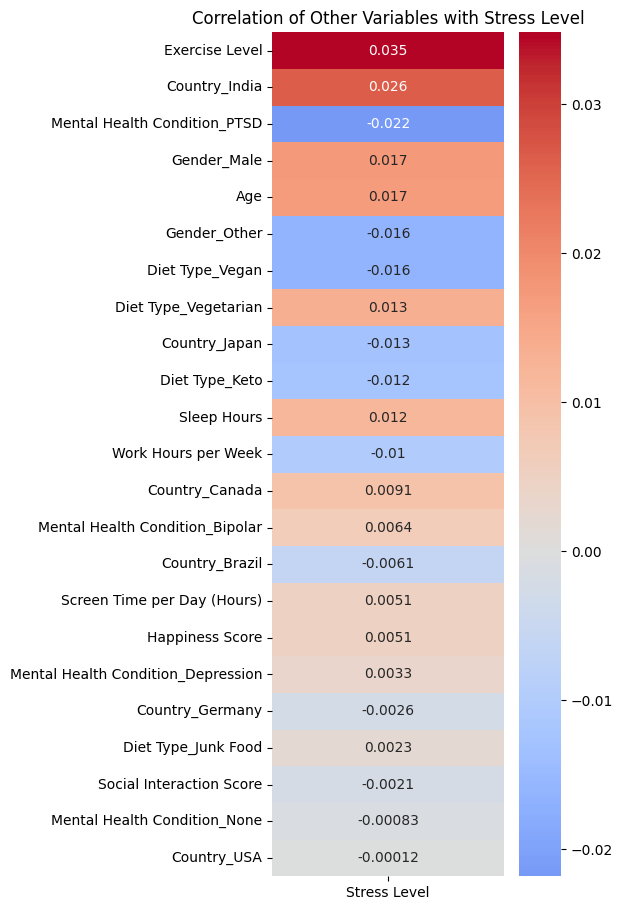

In [ ]:
# Stress Level과 다른 변수들의 상관계수 계산
stress_corr = df.corr()['Stress Level'].drop('Stress Level')  # 자기 자신은 제외

# 절댓값 기준 내림차순 정렬 (가장 관련 있는 순서대로 보기 위함)
stress_corr = stress_corr.reindex(stress_corr.abs().sort_values(ascending=False).index)

# 히트맵 시각화
plt.figure(figsize=(6, len(stress_corr) * 0.4))  # 변수 수에 따라 높이 조정
sns.heatmap(stress_corr.to_frame(), annot=True, cmap='coolwarm', center=0, cbar=True)
plt.title('Correlation of Other Variables with Stress Level')
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 36 candidates, totalling 180 fits
🎯 Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}

📋 Classification Report:
               precision    recall  f1-score   support

           1       0.34      0.31      0.32       192
           2       0.34      0.46      0.39       203
           3       0.37      0.27      0.31       205

    accuracy                           0.35       600
   macro avg       0.35      0.35      0.34       600
weighted avg       0.35      0.35      0.34       600

✅ Accuracy: 0.34833333333333333
🧩 Confusion Matrix:
 [[59 89 44]
 [58 94 51]
 [56 93 56]]


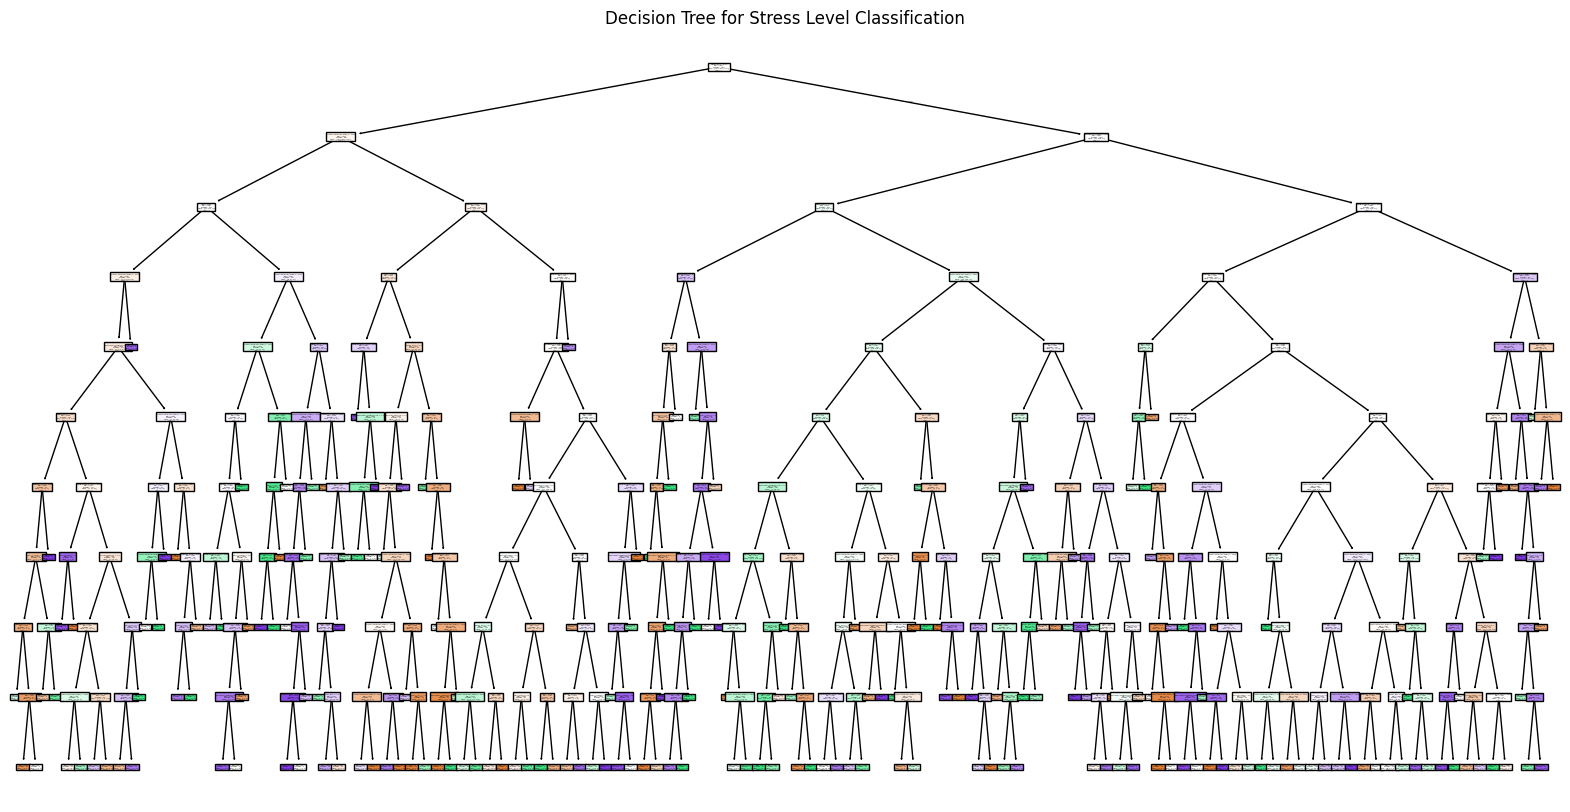

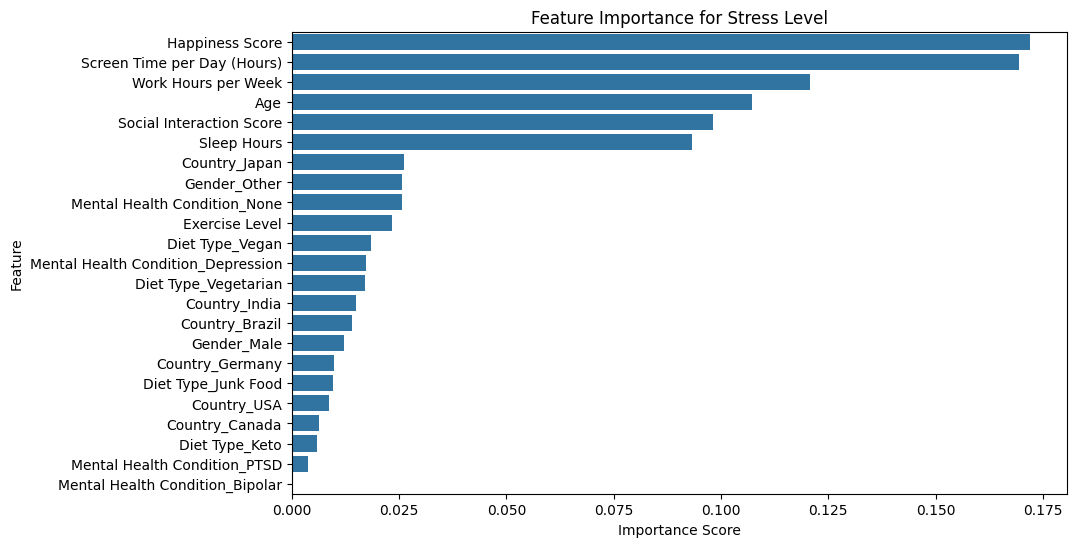

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 1. 입력(X), 타겟(y) 나누기
X = df.drop(columns=['Stress Level'])
y = df['Stress Level'].astype(int)  # 스트레스 레벨은 정수형으로

# 🎯 2. 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔍 3. 하이퍼파라미터 튜닝
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# ✅ 4. 최적 모델 평가
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("🎯 Best Parameters:", grid_search.best_params_)
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 🌳 5. 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['1', '2', '3'], filled=True)
plt.title("Decision Tree for Stress Level Classification")
plt.show()

# 🔥 6. Feature Importance 시각화
importances = best_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importance for Stress Level')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [ ]:
# y를 0,1,2로 조정
y_adjusted = y - 1

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y_adjusted, test_size=0.2, random_state=42, stratify=y_adjusted
)

# 랜덤포레스트 하이퍼파라미터 그리드 설정
rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV
rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

print("Random Forest Best Params:", rf_grid.best_params_)
rf_preds = rf_grid.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.36      0.35       202
           1       0.34      0.33      0.34       198
           2       0.35      0.33      0.34       200

    accuracy                           0.34       600
   macro avg       0.34      0.34      0.34       600
weighted avg       0.34      0.34      0.34       600

Random Forest Confusion Matrix:
[[73 60 69]
 [79 66 53]
 [68 67 65]]
Random Forest Accuracy: 0.34


In [ ]:
param_grid = {
    'max_depth': [10, 15, 20, 25, 30],  # 이전보다 더 큰 값들
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best max_depth:", grid.best_params_['max_depth'])
print("Best Parameters:", grid.best_params_)

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best max_depth: 15
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.35      0.31      0.33       202
           1       0.33      0.28      0.30       198
           2       0.36      0.46      0.41       200

    accuracy                           0.35       600
   macro avg       0.35      0.35      0.35       600
weighted avg       0.35      0.35      0.35       600

Accuracy: 0.35
Confusion Matrix:
 [[63 55 84]
 [66 55 77]
 [52 56 92]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

param_grid = {
    'max_depth': [10, 11, 12, 13, 14, 15, 16,17, 18,19, 20],  # 10~20 사이 촘촘한 값들
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best max_depth:", grid.best_params_['max_depth'])
print("Best Parameters:", grid.best_params_)

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best max_depth: 16
Best Parameters: {'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.36      0.32      0.34       202
           1       0.32      0.41      0.36       198
           2       0.38      0.32      0.35       200

    accuracy                           0.35       600
   macro avg       0.35      0.35      0.35       600
weighted avg       0.35      0.35      0.35       600

Accuracy: 0.34833333333333333
Confusion Matrix:
 [[64 90 48]
 [60 81 57]
 [55 81 64]]


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# y가 1,2,3이면 0부터 시작하도록 변환
y_adjusted = y - 1

X_train, X_test, y_train, y_test = train_test_split(
    X, y_adjusted, test_size=0.2, random_state=42, stratify=y_adjusted
)

# 1) 랜덤포레스트
rf = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(rf, rf_param_grid, cv=3, n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)
rf_preds = rf_grid.predict(X_test)

print("Random Forest Best Params:", rf_grid.best_params_)
print(classification_report(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("="*50)

# 2) SVM (시간 오래 걸릴 수 있음, 필요시 'linear'로 바꿔도 됨)
svm = SVC(random_state=42)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(svm, svm_param_grid, cv=3, n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)
svm_preds = svm_grid.predict(X_test)

print("SVM Best Params:", svm_grid.best_params_)
print(classification_report(y_test, svm_preds))
print(confusion_matrix(y_test, svm_preds))
print("SVM Accuracy:", accuracy_score(y_test, svm_preds))
print("="*50)

# 3) 로지스틱 회귀
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # l1은 solver 제한 때문에 제외
    'solver': ['lbfgs', 'saga']
}
logreg_grid = GridSearchCV(logreg, logreg_param_grid, cv=3, n_jobs=-1, verbose=1)
logreg_grid.fit(X_train, y_train)
logreg_preds = logreg_grid.predict(X_test)

print("Logistic Regression Best Params:", logreg_grid.best_params_)
print(classification_report(y_test, logreg_preds))
print(confusion_matrix(y_test, logreg_preds))
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_preds))
print("="*50)

# 4) XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1],
    'min_child_weight': [1, 5]
}
xgb_grid = GridSearchCV(xgb, xgb_param_grid, cv=3, n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)
xgb_preds = xgb_grid.predict(X_test)

print("XGBoost Best Params:", xgb_grid.best_params_)
print(classification_report(y_test, xgb_preds))
print(confusion_matrix(y_test, xgb_preds))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("="*50)



Fitting 3 folds for each of 36 candidates, totalling 108 fits
Random Forest Best Params: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.37      0.35      0.36       202
           1       0.36      0.36      0.36       198
           2       0.40      0.41      0.40       200

    accuracy                           0.38       600
   macro avg       0.37      0.38      0.37       600
weighted avg       0.37      0.38      0.37       600

[[71 69 62]
 [64 72 62]
 [59 59 82]]
Random Forest Accuracy: 0.375
Fitting 3 folds for each of 12 candidates, totalling 36 fits
SVM Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.35      0.36      0.36       202
           1       0.34      0.36      0.35       198
           2       0.36      0.34      0.35       200

    accuracy                        

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:00:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.35      0.34      0.35       202
           1       0.32      0.30      0.31       198
           2       0.33      0.35      0.34       200

    accuracy                           0.33       600
   macro avg       0.33      0.33      0.33       600
weighted avg       0.33      0.33      0.33       600

[[69 62 71]
 [65 60 73]
 [63 67 70]]
XGBoost Accuracy: 0.33166666666666667


In [ ]:
# 5) LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm_param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [10, 15],
    'num_leaves': [31, 50],
    'min_data_in_leaf': [5, 10, 20],
    'min_split_gain': [0.0, 0.1],
    'n_estimators': [100, 200]
}

lgbm_grid = GridSearchCV(lgbm, lgbm_param_grid, cv=3, n_jobs=-1, verbose=1)
lgbm_grid.fit(X_train, y_train)
lgbm_preds = lgbm_grid.predict(X_test)

print("LightGBM Best Params:", lgbm_grid.best_params_)
print(classification_report(y_test, lgbm_preds))
print(confusion_matrix(y_test, lgbm_preds))
print("LightGBM Accuracy:", accuracy_score(y_test, lgbm_preds))


Fitting 3 folds for each of 96 candidates, totalling 288 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 450
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 23
[LightGBM] [Info] Start training from score -1.091140
[LightGBM] [Info] Start training from score -1.108663
[LightGBM] [Info] Start training from score -1.096115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War